In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [322]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [323]:
def log_loss(y, P):
    return - (y*np.log(P + 0.0001) + (1-y)*np.log(1 - P + 0.0001))

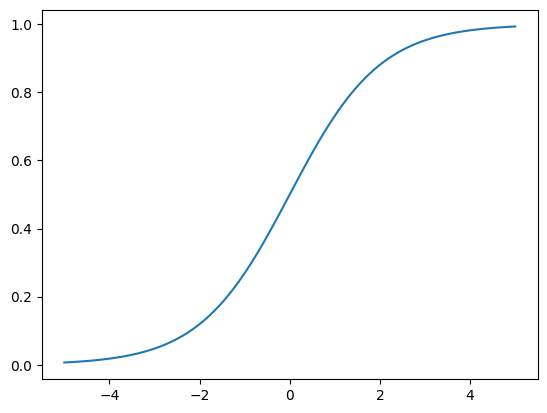

In [324]:
x = np.linspace(-5, 5, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

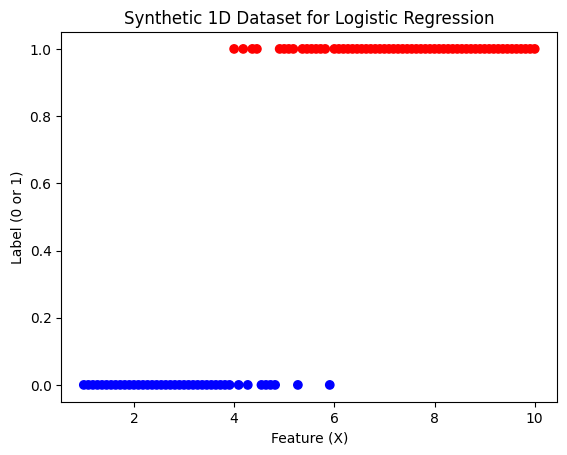

In [325]:
np.random.seed(42)

# Generate a 1D dataset
num_samples = 100
X = np.linspace(1, 10, num_samples)  # 1D feature space
# Create labels (0 or 1) based on a simple condition
# You can modify this condition to create different patterns
y = np.where(X < 5 + np.random.normal(scale=1, size=num_samples), 0, 1)

# Plot the dataset
plt.scatter(X, y, color=['red' if label == 1 else 'blue' for label in y], marker='o')
X = X - X.mean()
plt.title('Synthetic 1D Dataset for Logistic Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Label (0 or 1)')
plt.show()

In [326]:
b = np.ones(len(X)).reshape(-1,1)

In [327]:
X = X.reshape(num_samples, 1)
y = y.reshape(num_samples, 1)
X.shape, y.shape

((100, 1), (100, 1))

In [328]:
X = np.concatenate((b, X), axis = 1)
X.shape

(100, 2)

In [329]:
W = np.random.rand(X.shape[1], y.shape[1])
W.shape

(2, 1)

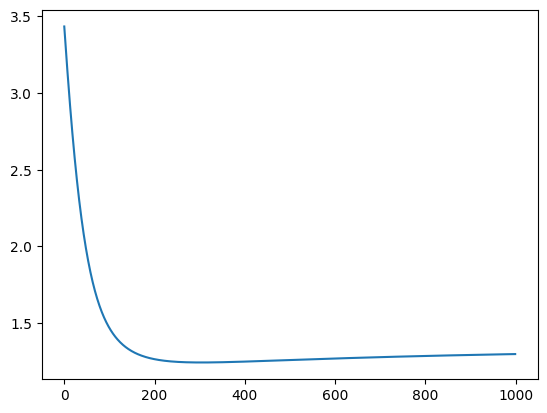

In [330]:
epochs = 1000
learning_rate = 0.0001
history = []
for i in range (epochs):
    P = sigmoid(X @ W)
    loss = np.sum(log_loss(P, y)) / (X.shape[0])
    history.append(loss)
    dL = X.T @ (1 - y)
    W = W - learning_rate * dL
plt.plot(history)

In [331]:
y_pred = sigmoid(X @ W)

In [332]:
threshold = 0.5

In [333]:
y_pred[y_pred >= threshold] = 1
y_pred[y_pred < threshold] = 0
print('Accuracy', accuracy_score(y, y_pred))

Accuracy 0.85
